<a href="https://colab.research.google.com/github/FelipeRuanMarinheiro/FelipeRuanMarinheiro/blob/main/SOJA_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressões SOJA - Contrato futuro Perpétuo


*   Para editar este script basta criar uma cópia em seu google drive
*   No tópico obtenção de dados é possivel alterar tanto o periodo quanto o ativo em questão.
*   Ao alterar o ativo, assim como o período é recomendado discrição para com os dados.
*   A ideia deste script é explorar as relações temporais e de volume com o preço.
*   Ao longo desse script você encontrará gráficos históricos, disperção, analises de correlação (pearson e spearman), normalizações estatisticas e inferenciais, clusterizações, regressões lineares e polinomiais.




 https://wa.me/5531997482948

 https://www.linkedin.com/in/felipe-ruan/



##LIBRARIES

In [ ]:
#Importação de libs

#Instalação
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install yfinance
!pip install scipy
!pip_install seaborn
!pip install pandas_ta
!pip install mplfinance
##Importação funções necessárias
import statsmodels.api as sm
import mplfinance as mpf
import pandas_ta
import numpy as np #operacoes matematicas
import pandas as pd #operacoes com os dados
import matplotlib.pyplot as plt #gráficos
import yfinance as yf #dados historicos
import scipy #stats
import seaborn as sns #heatmap
from sklearn.cluster import KMeans #clusterização dos dados
from sklearn.preprocessing import StandardScaler #preparação de dados
from sklearn.linear_model import LinearRegression #regressao
from sklearn.model_selection import train_test_split #regressao
from scipy import stats
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error, r2_score



/bin/bash: line 1: pip_install: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=6a270235f216ce25793b15d2c271a0f08a332ade8ab9ef275b95cd24df9fd20a
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


##OBTENÇÃO DADOS **(YAHOO FINANCE)**

In [ ]:
# Definir o ticker do contrato futuro de soja (Dataframe Provisório, estou buscando a serie perpétua)
ticker = "ZS=F"
# Baixar dados históricos desde o início do contrato (1997)
df_soy = yf.download(ticker, start = "2000-12-02", end = '2024-03-25', interval="1d")


[*********************100%%**********************]  1 of 1 completed


##ANÁLISE EXPLORATÓRIA E TRATAMENTO DE DADOS - **(PANDAS)**
Grande parte dos tratamentos dos dados e definições dentro do dataframe são realizadas aqui. Entretanto as normalizações são realizadas diretamente nos tópicos relacionados.

In [ ]:
print(df_soy.columns) # explora de maneira generalizada as colunas

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
print(df_soy.index) #mostra qual padrão estão dispostos os dados do indice, qual é o indice e qual type...


DatetimeIndex(['2000-12-04', '2000-12-05', '2000-12-06', '2000-12-07',
               '2000-12-08', '2000-12-11', '2000-12-12', '2000-12-13',
               '2000-12-14', '2000-12-15',
               ...
               '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14',
               '2024-03-15', '2024-03-18', '2024-03-19', '2024-03-20',
               '2024-03-21', '2024-03-22'],
              dtype='datetime64[ns]', name='Date', length=5861, freq=None)


In [ ]:
print(df_soy.shape) #mostra o formato do dataframe dos dados linhasXcolunas

(5861, 6)


In [ ]:
print(df_soy.head()) #5 primeiras linhas

             Open   High     Low   Close  Adj Close  Volume
Date                                                       
2000-12-04  508.0  508.0  503.50  505.25     505.25     159
2000-12-05  504.0  504.0  501.50  502.00     502.00     249
2000-12-06  500.0  500.0  498.50  499.75     499.75     892
2000-12-07  507.0  510.0  506.75  509.75     509.75     311
2000-12-08  503.0  503.0  499.50  500.00     500.00     411


In [ ]:
df_soy.tail() #5 ultimas linhas

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-18,1198.5,1206.00,1186.75,1187.75,1187.75,97550
2024-03-19,1188.0,1192.25,1181.00,1185.50,1185.50,103620
2024-03-20,1185.5,1211.75,1183.50,1209.50,1209.50,161255
2024-03-21,1209.0,1226.75,1204.00,1212.00,1212.00,150049
2024-03-22,1211.0,1211.25,1189.25,1192.50,1192.50,121895


In [ ]:
df_soy.sample() #amostra aleatoria dos dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-15,1483.5,1488.25,1460.0,1465.75,1465.75,103081


In [ ]:
df_soy.info() #informações sobre os dados e valores nulos ou não MUITO IMPORTANTE.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5861 entries, 2000-12-04 to 2024-03-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5861 non-null   float64
 1   High       5861 non-null   float64
 2   Low        5861 non-null   float64
 3   Close      5861 non-null   float64
 4   Adj Close  5861 non-null   float64
 5   Volume     5861 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 320.5 KB


In [ ]:
resumo_diario = df_soy.describe() #Aqui temos uma exploração descritiva das estatisticas, quartis, media, dp
resumo_diario

,Open,High,Low,Close,Adj Close,Volume
count,5861.000000,5861.000000,5861.000000,5861.000000,5861.000000,5861.000000
mean,1008.328357,1018.001280,999.769451,1008.669937,1008.669937,50637.738952
std,334.526392,339.542354,329.702947,334.518141,334.518141,55300.941139
min,418.000000,418.500000,418.000000,418.500000,418.500000,0.000000
25%,775.000000,782.000000,769.000000,777.000000,777.000000,794.000000
50%,975.750000,985.250000,967.750000,975.750000,975.750000,25445.000000
75%,1310.000000,1322.750000,1296.250000,1310.000000,1310.000000,96312.000000
max,1778.500000,1794.750000,1760.500000,1771.000000,1771.000000,352462.000000


###Agrupamento e Tratamento dos DADOS

In [ ]:
# Agrupar os dados por mês e Ano
df_soy_mensal = df_soy.groupby(pd.Grouper(level="Date", freq="M")) #por mes
df_soy_anual = df_soy.groupby(pd.Grouper(level="Date", freq= "Y")) #por ano


# Calcular estatísticas básicas
resumo_mensal = df_soy_mensal["Adj Close"].agg(["mean", "std", "min", "max"])
resumo_anual = df_soy_anual["Adj Close"].agg(["mean", "std", "min", "max"])
resumo_mensal.rename(columns = {'mean': 'Adj Close'}, inplace = True) #trocando o nome mean para Adj Close
resumo_mensal.head()
resumo_anual.rename(columns = {'mean': 'Adj Close'}, inplace = True) #trocando o nome mean para Adj Close
resumo_anual.head()

#Volume
resumo_mensal_vol = df_soy_mensal["Volume"].agg(["mean", "std", "min", "max"])
resumo_mensal_vol.rename(columns = {'mean': 'Volume'}, inplace = True) #trocando o nome mean para Adj Close
resumo_mensal_vol.head()

# Exibir o resumos
display(resumo_mensal)
display(resumo_anual)

,Adj Close,std,min,max
Date,,,,
2000-12-31,505.986842,4.663298,499.00,513.00
2001-01-31,478.904762,12.695343,459.75,500.00
2001-02-28,456.144737,5.933846,447.75,468.00
2001-03-31,448.375000,8.565487,435.50,463.00
2001-04-30,431.687500,5.503513,422.00,442.00
...,...,...,...,...
2023-11-30,1344.869048,22.823866,1291.25,1385.00
2023-12-31,1310.925000,11.070973,1293.50,1336.00
2024-01-31,1230.154762,21.265652,1194.25,1274.00


,Adj Close,std,min,max
Date,,,,
2000-12-31,505.986842,4.663298,499.00,513.00
2001-12-31,459.169028,25.336817,422.00,529.00
2002-12-31,514.673611,54.442355,418.50,602.00
2003-12-31,635.225198,76.334245,532.50,800.00
2004-12-31,751.889328,186.286354,502.00,1055.75
2005-12-31,608.261858,53.847133,499.50,744.50
2006-12-31,591.943452,37.815493,527.25,688.00
2007-12-31,863.781873,136.485953,653.50,1220.75
2008-12-31,1232.832016,224.389771,783.50,1658.00


In [ ]:
display(df_soy) #DIARIO

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-04,508.0,508.00,503.50,505.25,505.25,159
2000-12-05,504.0,504.00,501.50,502.00,502.00,249
2000-12-06,500.0,500.00,498.50,499.75,499.75,892
2000-12-07,507.0,510.00,506.75,509.75,509.75,311
2000-12-08,503.0,503.00,499.50,500.00,500.00,411
...,...,...,...,...,...,...
2024-03-18,1198.5,1206.00,1186.75,1187.75,1187.75,97550
2024-03-19,1188.0,1192.25,1181.00,1185.50,1185.50,103620
2024-03-20,1185.5,1211.75,1183.50,1209.50,1209.50,161255


##GRÁFICOS **(MATPLOTLIB)**
Aqui são aplicadas as estatisticas descritivas com intuito de compreender os dados e corroborar com as estatisticas paramétricas.

###Gráfico Evolução dos preços




####Gráfico Evolução dos preços - DIARIO

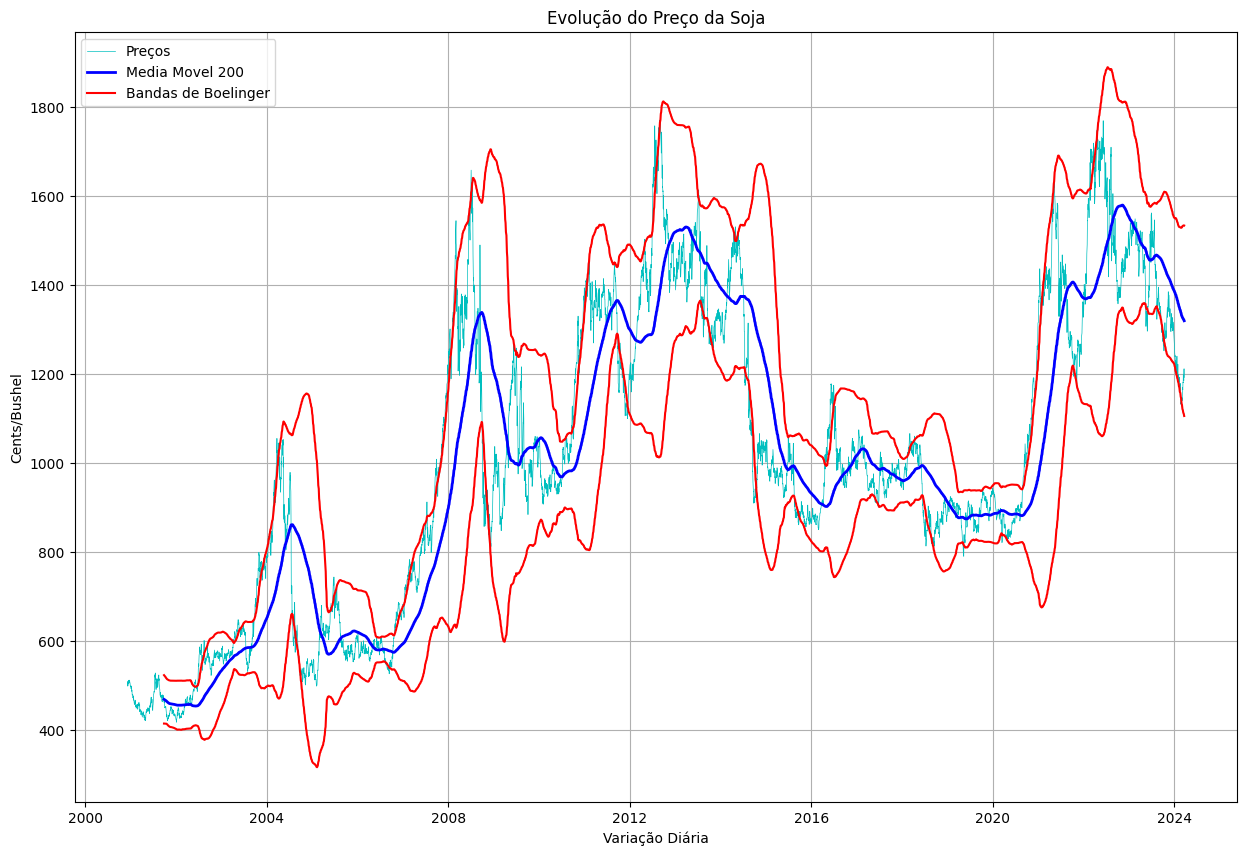

In [ ]:
#DIÁRIO
import pandas_ta as ta

mediamovel200_preco = df_soy['Adj Close'].rolling(200).mean() #média movel simples 200 periodos
desvio_padrao = ta.stdev(df_soy['Adj Close'], length=200, multiplier=0.5)  # Definição do desvio

# Calcular as bandas superior e inferior de Bollinger
upper_band = mediamovel200_preco + 2 * desvio_padrao
lower_band = mediamovel200_preco - 2 * desvio_padrao
# Plotar o gráfico de linhas
plt.figure(figsize=(15, 10))
plt.plot(df_soy.index, df_soy['Adj Close'], marker='', linestyle='-', linewidth = 0.5, color='c')
plt.plot(df_soy.index, mediamovel200_preco, color='b', linewidth=2)
plt.plot(df_soy.index, upper_band, color='r', label='Banda Superior')
plt.plot(df_soy.index, lower_band, color='r', label='Banda Inferior')

# (data-dia, preço ajuste)   = (x,y) do gráfico
# marker=''      >> especifica que não queremos pontos marcados nos dados
# linestyle='-'   >> especifica que as linhas devem ser contínuas (outra opção seria ='--')
# color='b'       >> especifica a cor do gráfico em azul (b = blue)
plt.xlabel('Variação Diária')     # rótulo do eixo X
plt.ylabel('Cents/Bushel')   # rótulo do eixo Y
plt.title('Evolução do Preço da Soja')  # Título do Gráfico
plt.grid(True)        # Linhas de grades no gráfico
plt.legend(labels=['Preços', 'Media Movel 200', 'Bandas de Boelinger'])

plt.show()            # Exibe o Gráfico

####Gráfico Evolução dos preços - MENSAL

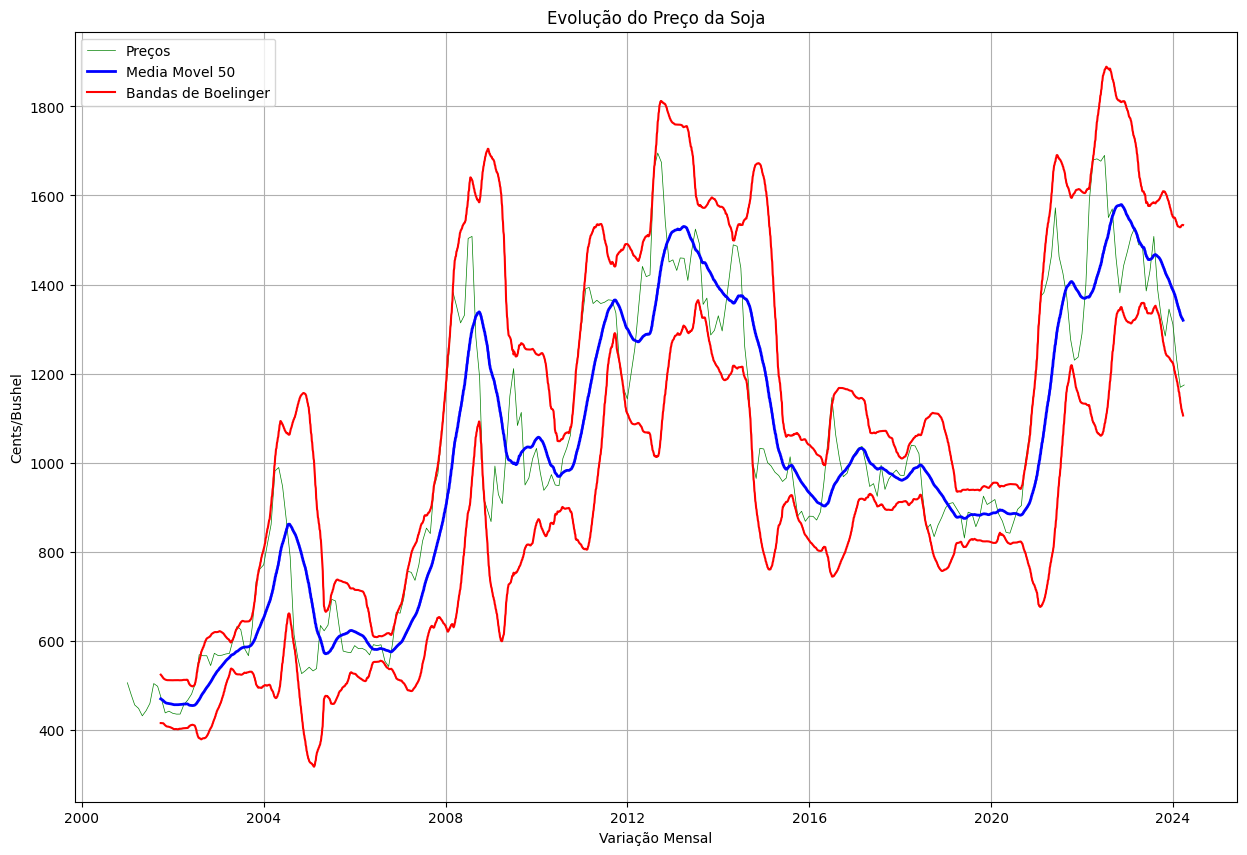

In [ ]:
#Mês
mediamovel50_preco = df_soy['Adj Close'].rolling(200).mean() #média movel simples 200 periodos
desvio_padrao = ta.stdev(df_soy['Adj Close'], length=200, multiplier=0.5)  # Use 'stdev'

# Calcular as bandas superior e inferior de Bollinger
upper_band = mediamovel50_preco + 2 * desvio_padrao
lower_band = mediamovel50_preco - 2 * desvio_padrao
# Plotar o gráfico de linhas
plt.figure(figsize=(15, 10))
plt.plot(resumo_mensal.index, resumo_mensal['Adj Close'], marker='', linestyle='-', linewidth = 0.5, color='g')
plt.plot(df_soy.index, mediamovel50_preco, color='b', linewidth=2)
plt.plot(df_soy.index, upper_band, color='r', label='Banda Superior')
plt.plot(df_soy.index, lower_band, color='r', label='Banda Inferior')
# (data-dia, preço ajuste)   = (x,y) do gráfico
# marker=''      >> especifica que não queremos pontos marcados nos dados
# linestyle='-'   >> especifica que as linhas devem ser contínuas (outra opção seria ='--')
# color='b'       >> especifica a cor do gráfico em azul (b = blue)
plt.xlabel('Variação Mensal')     # rótulo do eixo X
plt.ylabel('Cents/Bushel')   # rótulo do eixo Y
plt.title('Evolução do Preço da Soja')  # Título do Gráfico
plt.grid(True)        # Linhas de grades no gráfico
plt.legend(labels=['Preços', 'Media Movel 50', 'Bandas de Boelinger'])

plt.show()            # Exibe o Gráfico




####Gráfico Evolução dos preços - ANUAL

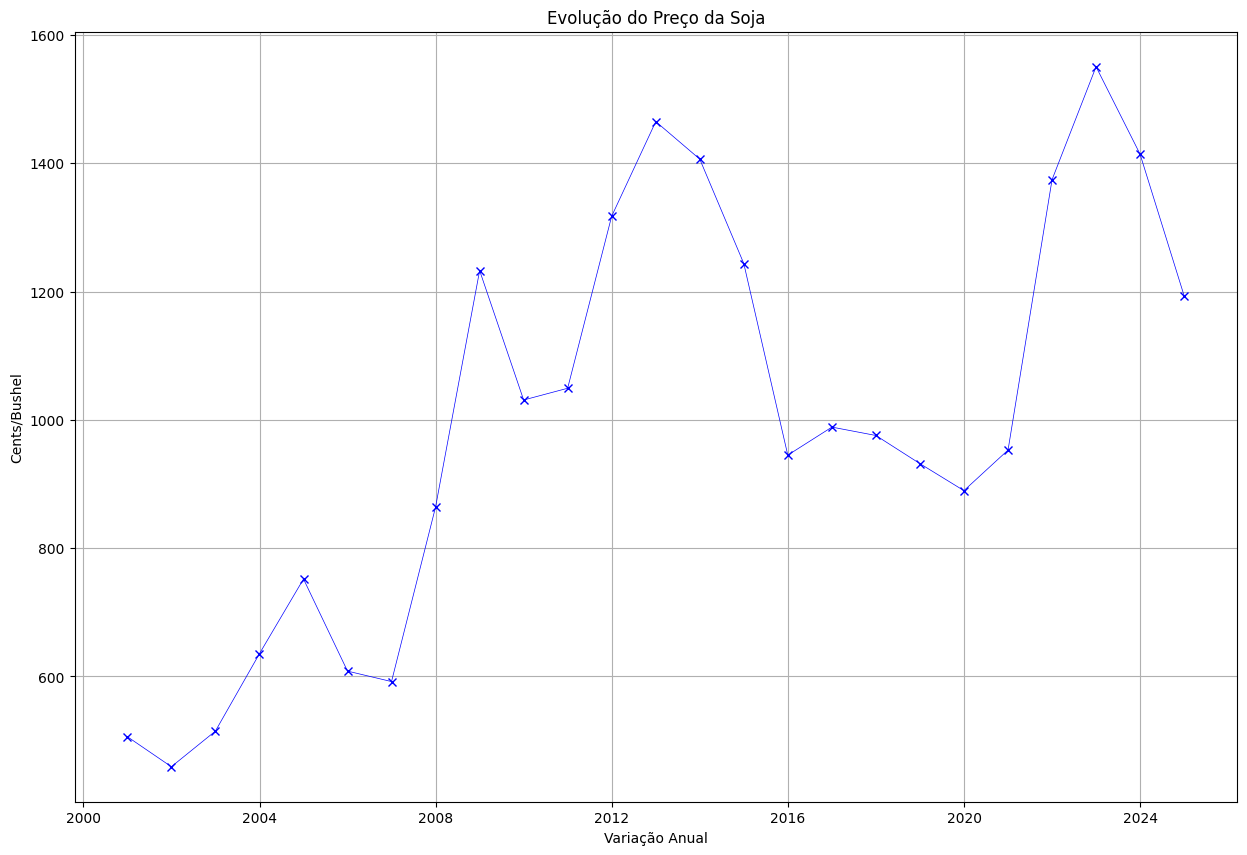

In [ ]:
#Ano
# Plotar o gráfico de linhas
plt.figure(figsize=(15, 10))
plt.plot(resumo_anual.index, resumo_anual['Adj Close'], marker='x', linestyle='-', linewidth = 0.5, color='b')
# (data-dia, preço ajuste)   = (x,y) do gráfico
# marker=''      >> especifica que não queremos pontos marcados nos dados
# linestyle='-'   >> especifica que as linhas devem ser contínuas (outra opção seria ='--')
# color='b'       >> especifica a cor do gráfico em azul (b = blue)
plt.xlabel('Variação Anual')     # rótulo do eixo X
plt.ylabel('Cents/Bushel')   # rótulo do eixo Y
plt.title('Evolução do Preço da Soja')  # Título do Gráfico
plt.grid(True)        # Linhas de grades no gráfico

plt.show()            # Exibe o Gráfico



####Gráfico Distribuição dos Preços - MENSAL (Não Normalizado)

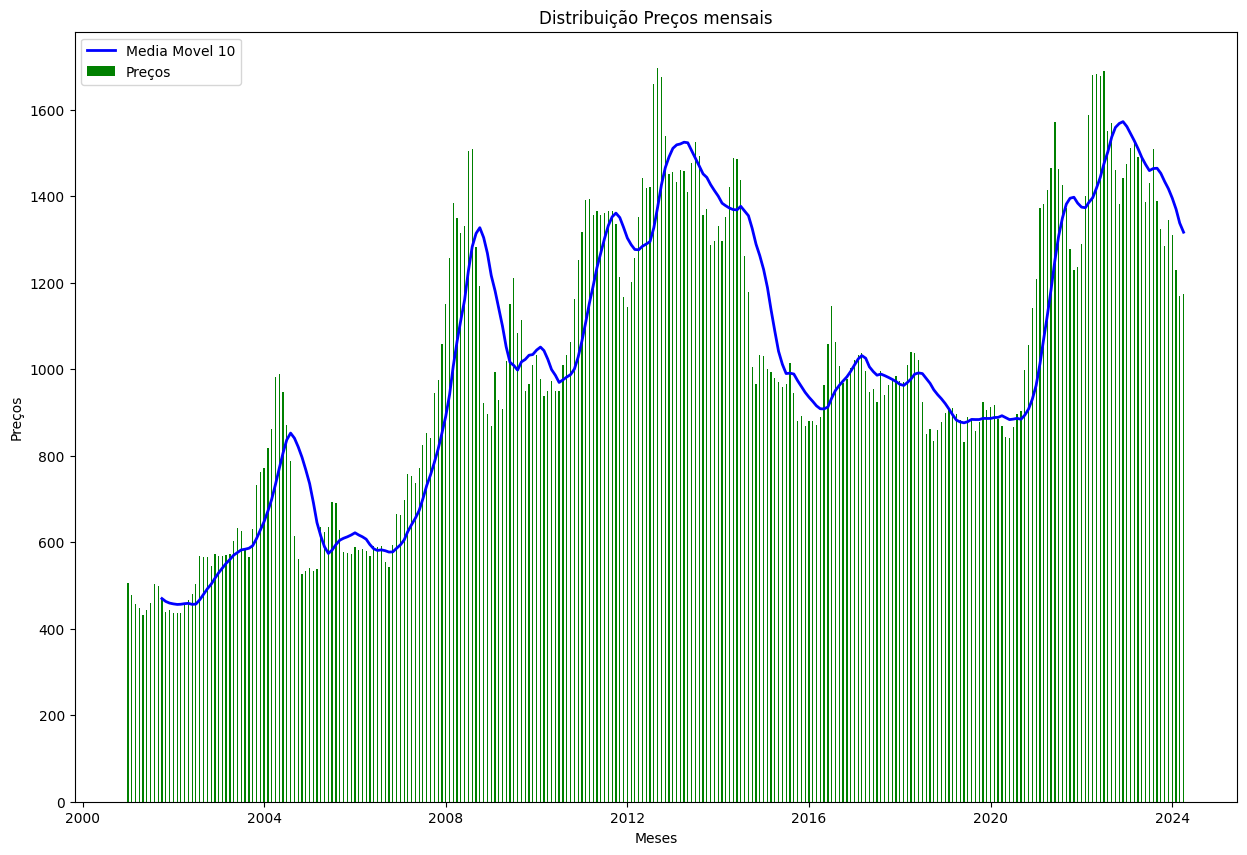

In [ ]:
#Gráfico de Barras Volume histórico médio de negociação mensal
mediamovel10_preco = resumo_mensal['Adj Close'].rolling(10).mean() #média movel simples 10 periodos

plt.figure(figsize=(15, 10))
plt.bar(resumo_mensal.index, resumo_mensal['Adj Close'], color='g', width=10)
plt.xlabel('Meses')  # rótulo do eixo X
plt.ylabel('Preços') # rótulo do eixo Y
plt.title('Distribuição Preços mensais')  # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas

# Adicionando uma linha para a média
plt.plot(resumo_mensal.index, mediamovel10_preco, color='b', linewidth=2)

# Mostrando a legenda
plt.legend(labels=['Media Movel 10', 'Preços'])

plt.show()  # Exibe o Gráfico



###Gráfico Evolução dos Volumes

####Gráfico Distribuição dos Volumes - MENSAL (Não Normalizado)

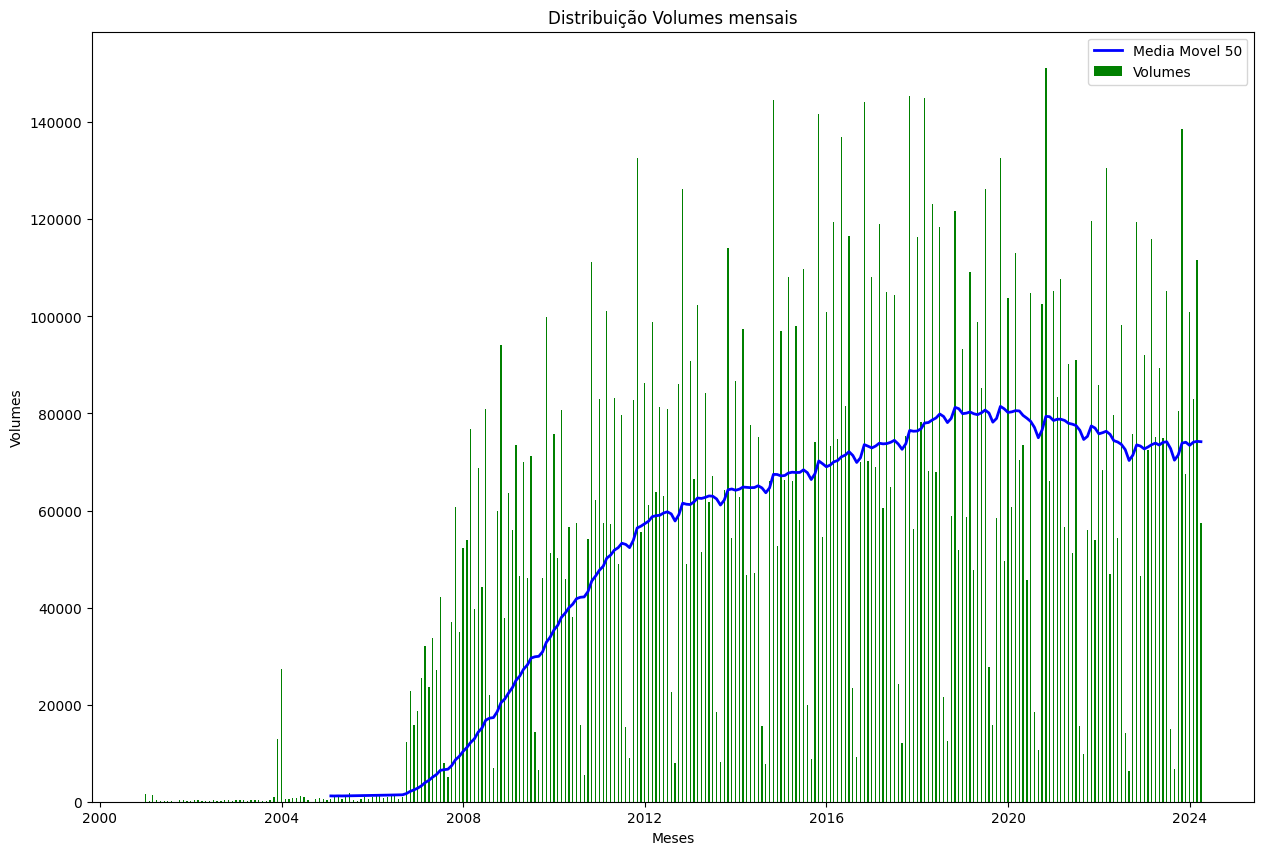

In [ ]:
#Gráfico de Barras Volume histórico médio de negociação mensal
mediamovel50_vol = resumo_mensal_vol['Volume'].rolling(50).mean() #média movel simples 50 periodos


plt.figure(figsize=(15, 10))
plt.bar(resumo_mensal_vol.index, resumo_mensal_vol['Volume'], color='g', width=10)
plt.xlabel('Meses')  # rótulo do eixo X
plt.ylabel('Volumes') # rótulo do eixo Y
plt.title('Distribuição Volumes mensais')  # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas

# Adicionando uma linha para a média
plt.plot(resumo_mensal.index, mediamovel50_vol, color='b', linewidth=2) #plotando MM50

# Mostrando a legenda
plt.legend(labels=['Media Movel 50', 'Volumes'])  # é usado para mostrar as legendas

plt.show()  # Exibe o Gráfico








###Gráfico Dispersão Preço x Volume - MENSAIS



####Gráfico Dispersão Preço x Volume - MENSAIS (NÃO NORMALIZADO)


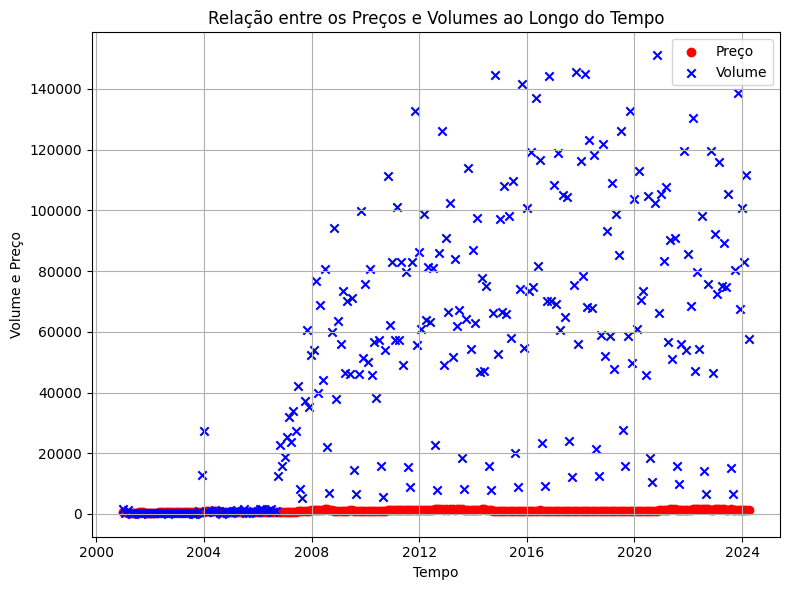

In [ ]:
#Dispersão entre variaveis (preço, volume)

tempo = resumo_mensal_vol.index  # Eixo x
plt.figure(figsize=(8, 6))

plt.scatter(tempo, resumo_mensal['Adj Close'], label='Preço', color='red', marker='o')
plt.scatter(tempo, resumo_mensal_vol['Volume'], label='Volume', color='blue', marker='x')
plt.xlabel('Tempo') # rótulo do eixo X
plt.ylabel('Volume e Preço') # rótulo do eixo Y
plt.title('Relação entre os Preços e Volumes ao Longo do Tempo') # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas no gráfico
plt.grid(True)  # adiciona linhas de grade ao gráfico para facilitar a leitura.
plt.tight_layout()  # é usado para evitar que as legendas se sobreponham ao gráfico.
plt.show()  # Exibe o Gráfico

##Verificou-se um gráfico distorcido, portando cabe aqui a normalização dos dados, partindo ambos preço e volume de um mesmo ponto inicial.

####Gráfico Dispersão Preço x Volume - MENSAIS (NORMALIZADO)

Dado a distorção gráfica no scatterplot temos a necessidade de normalização dos dados para melhor visualização.

###### Normalizações do Dataframes
Neste tópico foram realizados dois tipos de normalização.

**1ª - Dividindo os dados de preço e volume a partir de suas respectivas primeiras linhas.**
Desta maneira obtemos dados partindo de um ponto em comum e diminuição da amplitude dos dados.


**OBS:** essa primeira normalização não foi eficiente para visualização gráfica, haja vista que o gráfico ainda ficou distorcido em função do desvio padrão desproporcional do volume em relação ao desvio padrão do preço.




**2ª - Z Score Normalization:**
Com intuito de diminuir essa distorção gráfica, foi aplicado este método nos dados originais, para obter então assim dados com média=0 e desv.pad=1. Além disso esse método é responsavel por centralizar os dados em torno de zero. O que facilita a compreensão do gráfico.



In [ ]:
#Criando as listas com os dados necessarios.

datas = resumo_mensal.index.tolist()
print(datas)
precos = resumo_mensal['Adj Close'].tolist()
print(precos)
volumes = resumo_mensal_vol['Volume'].tolist()
print(volumes)

#Criando o dataframe a partir das listas.
data = {'Datas': datas, 'Preços': precos, 'Volumes': volumes}
df_p_v = pd.DataFrame(data)
print(df_p_v)

#Ajustando dataframe
df_p_v.index = df_p_v['Datas'] #transformando as datas para index
print(df_p_v)
df_p_v.drop('Datas', axis = 1, inplace = True) #excluindo a coluna a mais
print(df_p_v)

#Novo dataframe normalizado de modo que os valores iniciem de preço e volume iniciem a partir de 1.
df_p_v_normalizado = df_p_v/df_p_v.iloc[0]
print(df_p_v_normalizado)

#Vale ressaltar que a variação do volume é muito maior em relação a variação do preço da soja, portanto cabe uma normalização do tipo Z-Score, pois o grafico se manteve distorcido.
  ## Z SCORE NORMALIZATION:
  ## A logica do Zscore é reduzir a variação gráfica a partir de dados com elevado desvio padrao dado a diferença a partir entre valor observado e média.
  ## garante que os dados tenham média zero e desvio padrão 1 após a transformação; Todos os dados são centralizados em torno de zero.
    ###Calculando a média e o desvio padrão para cada coluna
mean_preco = df_p_v['Preços'].mean() #media
std_preco = df_p_v['Preços'].std() #dp
mean_volume = df_p_v['Volumes'].mean() #media
std_volume = df_p_v['Volumes'].std() #dp

    ### Aplicando a padronização (z-score normalization) e adicionando novas colunas "PPad = preço padronizado (zscore); VPad = volume padronizado(zcore) no df_p_v"
df_p_v['PPad'] = (df_p_v['Preços'] - mean_preco) / std_preco
df_p_v['VPad'] = (df_p_v['Volumes'] - mean_volume) / std_volume
print(df_p_v)





[Timestamp('2000-12-31 00:00:00', freq='M'), Timestamp('2001-01-31 00:00:00', freq='M'), Timestamp('2001-02-28 00:00:00', freq='M'), Timestamp('2001-03-31 00:00:00', freq='M'), Timestamp('2001-04-30 00:00:00', freq='M'), Timestamp('2001-05-31 00:00:00', freq='M'), Timestamp('2001-06-30 00:00:00', freq='M'), Timestamp('2001-07-31 00:00:00', freq='M'), Timestamp('2001-08-31 00:00:00', freq='M'), Timestamp('2001-09-30 00:00:00', freq='M'), Timestamp('2001-10-31 00:00:00', freq='M'), Timestamp('2001-11-30 00:00:00', freq='M'), Timestamp('2001-12-31 00:00:00', freq='M'), Timestamp('2002-01-31 00:00:00', freq='M'), Timestamp('2002-02-28 00:00:00', freq='M'), Timestamp('2002-03-31 00:00:00', freq='M'), Timestamp('2002-04-30 00:00:00', freq='M'), Timestamp('2002-05-31 00:00:00', freq='M'), Timestamp('2002-06-30 00:00:00', freq='M'), Timestamp('2002-07-31 00:00:00', freq='M'), Timestamp('2002-08-31 00:00:00', freq='M'), Timestamp('2002-09-30 00:00:00', freq='M'), Timestamp('2002-10-31 00:00:00'

###### Gráfico de dispersão PREÇO X VOLUME - Normalização primeira linha

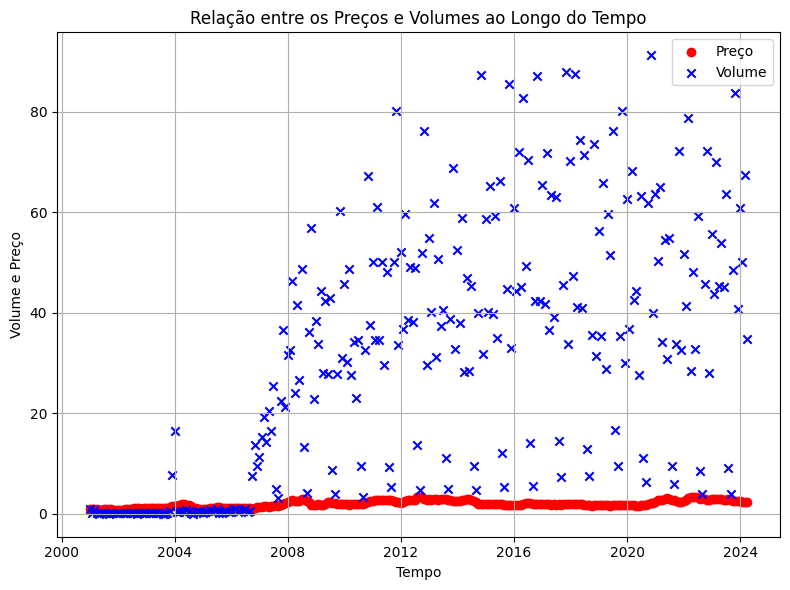

In [ ]:
#Gráfico de dispersão normalizado a partir da primeira linha:

tempo = df_p_v_normalizado.index  # Eixo x
plt.figure(figsize=(8, 6)) #tamanho grafico

plt.scatter(tempo, df_p_v_normalizado['Preços'], label='Preço', color='red', marker='o')
plt.scatter(tempo, df_p_v_normalizado['Volumes'], label='Volume', color='blue', marker='x')
plt.xlabel('Tempo') # rótulo do eixo X
plt.ylabel('Volume e Preço') # rótulo do eixo Y
plt.title('Relação entre os Preços e Volumes ao Longo do Tempo') # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas no gráfico
plt.grid(True)  # adiciona linhas de grade ao gráfico para facilitar a leitura.
plt.tight_layout()  # é usado para evitar que as legendas se sobreponham ao gráfico.
plt.show()  # Exibe o Gráfico

###### Gráfico de dispersão PREÇO X VOLUME - Z Score Normalization

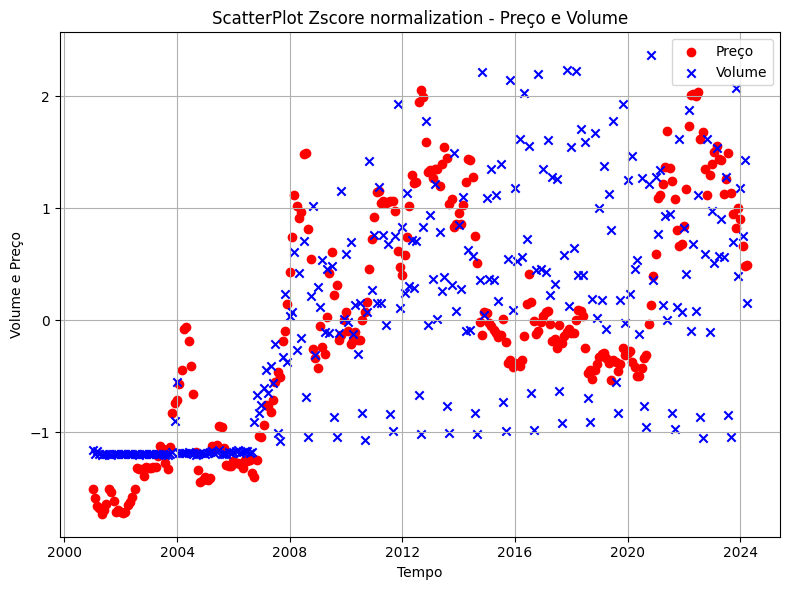

In [ ]:
#Gráfico de dispersão normalizado com Z-Score normalization:

tempo = df_p_v.index  # Eixo x
plt.figure(figsize=(8, 6)) #tamanho grafico

plt.scatter(tempo, df_p_v['PPad'], label='Preço', color='red', marker='o')
plt.scatter(tempo, df_p_v['VPad'], label='Volume', color='blue', marker='x')
plt.xlabel('Tempo') # rótulo do eixo X
plt.ylabel('Volume e Preço') # rótulo do eixo Y
plt.title('ScatterPlot Zscore normalization - Preço e Volume') # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas no gráfico
plt.grid(True)  # adiciona linhas de grade ao gráfico para facilitar a leitura.
plt.tight_layout()  # é usado para evitar que as legendas se sobreponham ao gráfico.
plt.show()  # Exibe o Gráfico

##CORRELAÇÃO PREÇOS E VOLUMES **(SCIPY; NUMPY; SEABORN)**
Serão realizadas aqui as correlações de pearson e spearman e verificadas suas respectivas premissas.

###Validação de Premissas
1ª etapa - verificação descritiva através da visualização gráfica da distribuição dos preços e volumes normalizados ao longo dos meses

2ª etapa - shapiro wilk

3ª etapa - boxcox normalization

4ª etapa - shapiro wilk


####Gráficos de distribuição

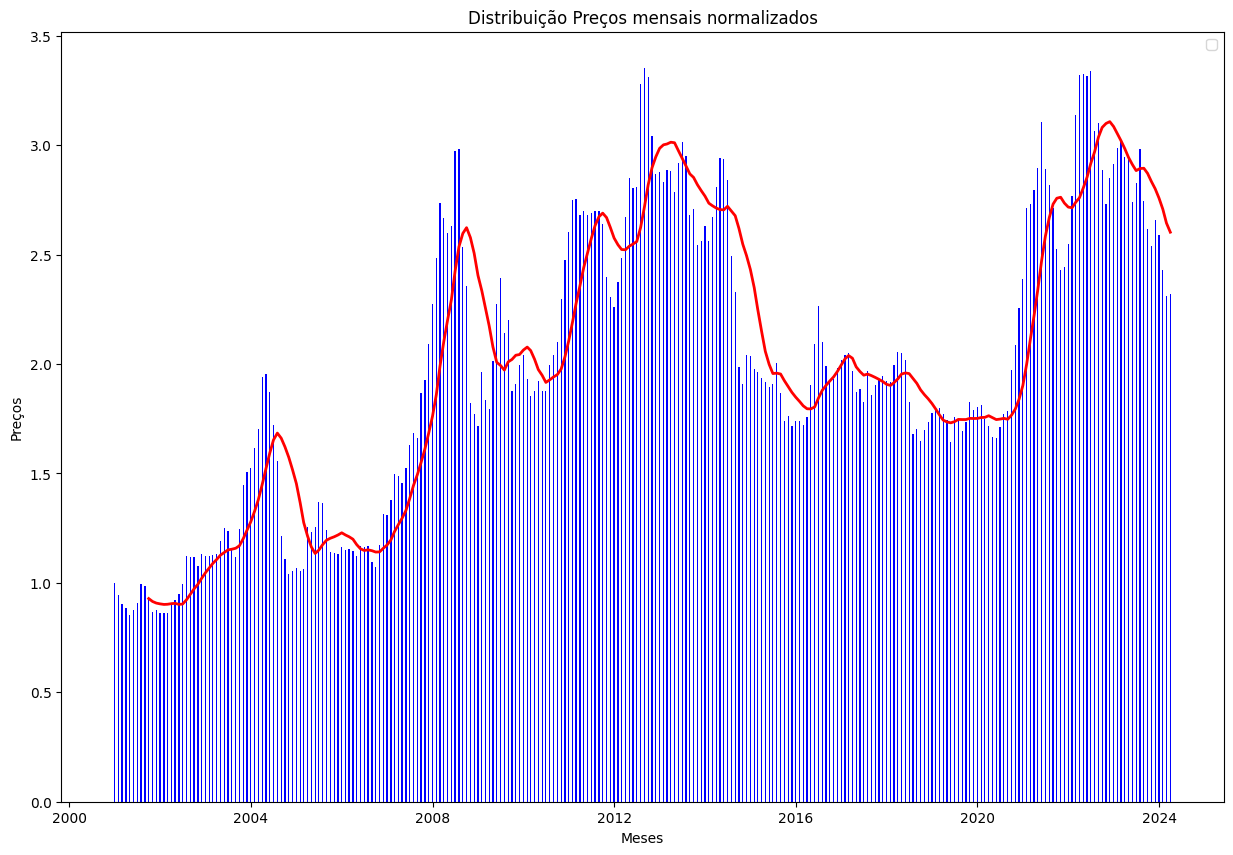

In [ ]:
#Gráfico de distribuição de Preços normalizados (metodo primeira linha)
mm10_pn = df_p_v_normalizado['Preços'].rolling(10).mean() #média movel simples 10 periodos
plt.figure(figsize=(15, 10))
plt.bar(df_p_v_normalizado.index, df_p_v_normalizado['Preços'], color='b', width=10)
plt.xlabel('Meses')  # rótulo do eixo X
plt.ylabel('Preços') # rótulo do eixo Y
plt.title('Distribuição Preços mensais normalizados')  # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas
plt.plot(df_p_v_normalizado.index, mm10_pn, color='r', linewidth=2)
plt.show()  # Exibe o Gráfico

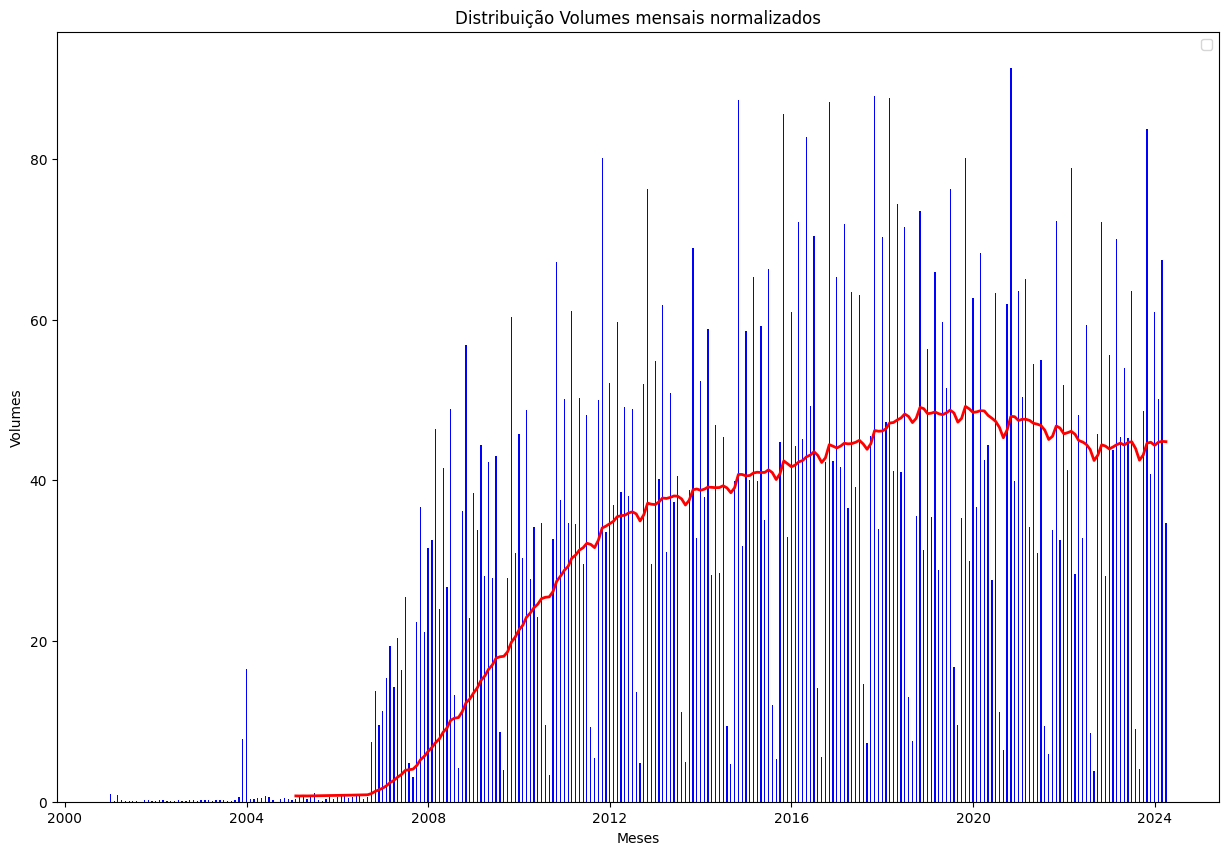

In [ ]:
#Gráfico de distribuição de Volumes normalizados
mm50_vn = df_p_v_normalizado['Volumes'].rolling(50).mean() #média movel simples 10 periodos
plt.figure(figsize=(15, 10))
plt.bar(df_p_v_normalizado.index, df_p_v_normalizado['Volumes'], color='b', width=10)
plt.xlabel('Meses')  # rótulo do eixo X
plt.ylabel('Volumes') # rótulo do eixo Y
plt.title('Distribuição Volumes mensais normalizados')  # Título do Gráfico
plt.legend()  # é usado para mostrar as legendas
plt.plot(df_p_v_normalizado.index, mm50_vn, color='r', linewidth=2)
plt.show()  # Exibe o Gráfico

####Teste de normalidade - Shapiro Wilk



In [ ]:
#from scipy import stats
# Teste de Shapiro-Wilk - Para PPad (z-score)
stat, p_valor = stats.shapiro(df_p_v['PPad'])

# Resultado
print("Estatística de teste:", stat)
print("Valor p:", p_valor)

# Interpretação do teste
alpha = 0.05  # nível de significância
if p_valor > alpha:
    print("Não podemos rejeitar a hipótese nula: os dados parecem ser normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: os dados não parecem ser normalmente distribuídos.")

Estatística de teste: 0.9610340595245361
Valor p: 7.598717957080225e-07
Rejeitamos a hipótese nula: os dados não parecem ser normalmente distribuídos.


In [ ]:
# Teste de Shapiro-Wilk - Para VPad (z-score)
stat, p_valor = stats.shapiro(df_p_v['VPad'])

# Resultado
print("Estatística de teste:", stat)
print("Valor p:", p_valor)

# Interpretação do teste
alpha = 0.05  # nível de significância
if p_valor > alpha:
    print("Não podemos rejeitar a hipótese nula: os dados parecem ser normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: os dados não parecem ser normalmente distribuídos.")

Estatística de teste: 0.9178357720375061
Valor p: 2.8010507108211513e-11
Rejeitamos a hipótese nula: os dados não parecem ser normalmente distribuídos.


#### Normalização Box-Cox
Acima foi verificado que mesmo após normalização do tipo Z-Score os dados ainda não seguem distribuição normal, portanto será realizado uma normalização do tipo Box-Cox.

Esse tipo de normalização tem foco em dados assimétricos e com heterocedasticidade, como o caso deste df.

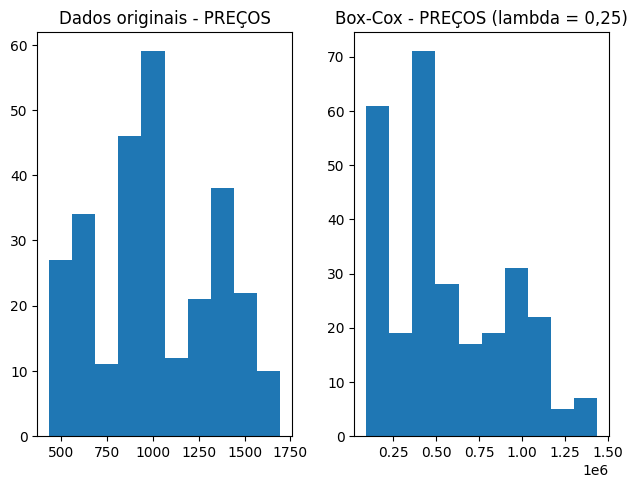

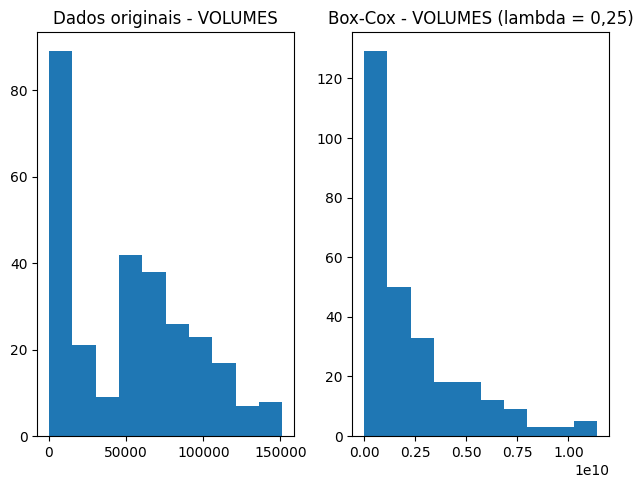



- PREÇOS:


Shapiro-Wilk (PREÇOS originais):
ShapiroResult(statistic=0.9610340595245361, pvalue=7.598717957080225e-07)

Shapiro-Wilk (PREÇOS normalizados):
ShapiroResult(statistic=0.9323415756225586, pvalue=5.318857576597225e-10)



- VOLUMES:


Shapiro-Wilk (Volumes originais):
ShapiroResult(statistic=0.9178357720375061, pvalue=2.8010507108211513e-11)

Shapiro-Wilk (Volumes normalizados):
ShapiroResult(statistic=0.8166269659996033, pvalue=1.6966106329450588e-17)



- INTERPRETAÇÃO:


A estatística do teste está próxima de 1, o que indica que os dados se assemelham a uma distribuição normal.
O valor p é menor que 0,05, o que normalmente rejeitaria a hipótese de normalidade. 
No entanto, valores de p extremamente baixos, como neste caso (e-15), devem ser interpretados com cautela.

O p-valor significativamente diminuido após a transformação, contraintuitivamente é um bom sinal na interpretação em termos de melhora e aproximação da normalidade.
Isso ocorre porque o p-valor tambem mede 

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy import stats

dados_p_boxcox = stats.boxcox(df_p_v['Preços'], lmbda=2) #aplicação da normalização preços Box-Cox
dados_v_boxcox = stats.boxcox(df_p_v['Volumes'], lmbda=2) #aplicação da normalização volumes Box-Cox

#Distribuição após transformações (COMPARAÇÃO) - PREÇOS:
plt.subplot(121)
plt.tight_layout()
plt.hist(df_p_v['Preços'])
plt.title("Dados originais - PREÇOS")

plt.subplot(122)
plt.tight_layout()
plt.hist(dados_p_boxcox)
plt.title("Box-Cox - PREÇOS (lambda = 0,25)")
plt.show()


#Distribuição após transformações (COMPARAÇÃO) - PREÇOS:
plt.subplot(121)
plt.tight_layout()
plt.hist(df_p_v['Volumes'])
plt.title("Dados originais - VOLUMES")

plt.subplot(122)
plt.tight_layout()
plt.hist(dados_v_boxcox)
plt.title("Box-Cox - VOLUMES (lambda = 0,25)")
plt.show()
print()
print()
# Verifica a normalidade dos dados antes e depois da transformação - PREÇOS
print("- PREÇOS:")
print()
print()
print("Shapiro-Wilk (PREÇOS originais):")
print(stats.shapiro(df_p_v['Preços']))
print()
print("Shapiro-Wilk (PREÇOS normalizados):")
print(stats.shapiro(dados_p_boxcox))
print()
print()
print()

# Verifica a normalidade dos dados antes e depois da transformação - PREÇOS
print("- VOLUMES:")
print()
print()
print("Shapiro-Wilk (Volumes originais):")
print(stats.shapiro(df_p_v['Volumes']))
print()
print("Shapiro-Wilk (Volumes normalizados):")
print(stats.shapiro(dados_v_boxcox))
print()
print()
print()
print("- INTERPRETAÇÃO:")
print()
print()
print("A estatística do teste está próxima de 1, o que indica que os dados se assemelham a uma distribuição normal.\nO valor p é menor que 0,05, o que normalmente rejeitaria a hipótese de normalidade. \nNo entanto, valores de p extremamente baixos, como neste caso (e-15), devem ser interpretados com cautela.")
print()
print("""O p-valor significativamente diminuido após a transformação, contraintuitivamente é um bom sinal na interpretação em termos de melhora e aproximação da normalidade.
Isso ocorre porque o p-valor tambem mede a discordancia dos dados em relação a normalidade.
- Um maior p-valor, maior discordancia da normalidade.
- Um menor p-valor menor discondância da realidade.
O valor de 0,05 é apenas um numero atrelado a um valor de probabilidade relativo a um conjunto de dados analisado sob mesmma perspectiva. Porém em termos comparativos a interpretação é outra.
Desta forma, os dados serão mantidos na base de Box-Cox pois houveram melhorias em termos de aproximação da normalidade.""")

###Correlação de Pearson


#### Dafaframe (boxcox) - Correlação de Person

In [ ]:
# #Listas
# dados_p_boxcox = stats.boxcox(df_p_v['Preços'], lmbda=0.25) #aplicação da normalização preços
# dados_v_boxcox = stats.boxcox(df_p_v['Volumes'], lmbda=0.25) #aplicação da normalização volumes
# datas = resumo_mensal.index.tolist()


#Criando o dataframe a partir das listas.
databoxcox = {'Datas': datas, 'Preços': dados_p_boxcox, 'Volumes': dados_v_boxcox}
df_p_v_boxcox = pd.DataFrame(databoxcox)
print(df_p_v_boxcox)

         Datas         Preços       Volumes
0   2000-12-31  128010.842192  1.370732e+06
1   2001-01-31  114674.385488  2.055570e+04
2   2001-02-28  104033.510474  9.476292e+05
3   2001-03-31  100519.570312  7.395458e+04
4   2001-04-30   93176.548828  5.654661e+03
..         ...            ...           ...
275 2023-11-30  904335.877622  2.281402e+09
276 2023-12-31  859261.677812  5.089633e+09
277 2024-01-31  756639.869118  3.437172e+09
278 2024-02-29  683733.062578  6.223263e+09
279 2024-03-31  689834.738770  1.651817e+09

[280 rows x 3 columns]


#### Correlação de Pearson / Heatmap

Matriz de Correlação

           Preços   Volumes
Preços   1.000000  0.295515
Volumes  0.295515  1.000000

P-valor: 4.761153293858405e-07


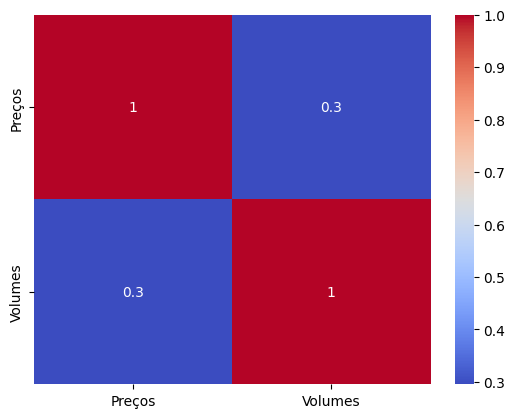



- Interpretação:

Temos uma correlação moderada positiva e significativa entre preço e volume.



In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns (# Geração de um heatmap para visualização da matriz de correlação)

# Cálculo da matriz de correlação de Pearson
corr_matrix = df_p_v_boxcox.corr(method='pearson', numeric_only=True)

# Visualização da matriz de correlação
print("Matriz de Correlação")
print()
print(corr_matrix)
print()
# Visualização da correlação entre Preços e Volumes
corr_preco_volume = corr_matrix.loc['Preços', 'Volumes']

# Teste de significância da correlação
from scipy.stats import pearsonr

pval = pearsonr(df_p_v_boxcox['Preços'], df_p_v_boxcox['Volumes'])[1]

# Impressão do p-valor
print(f"P-valor: {pval}")

# Geração de um heatmap para visualização da matriz de correlação
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
print()
print()
print("- Interpretação:")
print()
print("Temos uma correlação moderada positiva e significativa entre preço e volume.")
print()

###Correlação de Spearman


In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.stats import spearmanr

# Cálculo do coeficiente de correlação
corr_spearman, pval = spearmanr(df_p_v_boxcox['Preços'], df_p_v_boxcox['Volumes'])

# Impressão do coeficiente e do p-valor
print(f"Coeficiente de correlação de Spearman: {corr_spearman}")
print(f"P-valor: {pval}")

Coeficiente de correlação de Spearman: 0.5733806735873088
P-valor: 7.136831550839545e-26


###Interpretação: Correlação Pearson vs Spearman

A correlação de pearson se apresentou menor do que a de spearman.

Isso ocorre porque a correlação de pearson é parametrica e faz suposições sobre a distribuição dos dados.

A diferença entre a relação de acordo com os metodos gera fortes indicios de que a relação não é linear. Desta forma, a correlação de Spearman técnicamente é mais aceita, ainda mais levando em consideração que os dados não seguiram distribuição normal.

Os gráficos de dispersão reforçam uma relação mais forte entre ambos.

O próximo passo é realizar um estudo de regressão, no próximo tópico.



##REGRESSÃO **(SCIKITLEARN)** - **TRABALHANDO**
Com intuito de compreender melhor a relação entre preço e volume aqui são realizados e ajustadas algumas regressões.

###Regressão Linear Simples:
Sabemos que a relação entre preço e volume não é linear, entretanto o procedimento será realizado apenas para titulo de comparação com a regressão que será utilizada.

####Regressão Linear Simples (Dados Brutos)

#####Dados Brutos

In [ ]:
# # Importar bibliotecas
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# import statsmodels.api as sm
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.svm import SVC
# from sklearn.cluster import KMeans

# Manipulação para ps dados de entrada
## A fim de mitigar erros generalizados foram criadas novas listas
lista_p = list(df_p_v["Preços"])
print(lista_p)
lista_v = list(df_p_v["Volumes"])
print(lista_v)
print(type(lista_v[0])) #verificação classe dos objetos - OK (FLOAT)
print(type(lista_p[0])) #verificação classe dos objetos - OK (FLOAT)

##A partir dessas listas serão criados os arrays:
# Dados de entrada
X_bruto = np.array(lista_v)
X_bruto = X_bruto.reshape(-1, 1) #para o treinamento do modelo, faz-se necessário a criação de um array tipo matriz para X
y_bruto = np.array(lista_p) #para o treinamento do modelo, faz-se necessário a criação de um array tipo vetor para y
print(X_bruto)
print(y_bruto)





[505.9868421052632, 478.9047619047619, 456.14473684210526, 448.375, 431.6875, 443.51190476190476, 459.5875, 504.1666666666667, 498.07954545454544, 470.375, 438.29347826086956, 442.17857142857144, 437.3157894736842, 435.5238095238095, 435.63157894736844, 457.5875, 466.9431818181818, 480.57954545454544, 504.45, 569.0113636363636, 566.6363636363636, 566.6125, 544.5217391304348, 572.0875, 566.9642857142857, 567.8809523809524, 570.4736842105264, 571.9285714285714, 603.3928571428571, 632.547619047619, 625.3452380952381, 582.5, 566.6785714285714, 630.5833333333334, 732.0652173913044, 761.2763157894736, 770.7045454545455, 818.65, 861.5131578947369, 981.5978260869565, 989.297619047619, 946.75, 871.5227272727273, 788.6666666666666, 614.5, 561.8571428571429, 526.4404761904761, 532.9285714285714, 540.8636363636364, 532.5125, 537.75, 634.6136363636364, 622.5952380952381, 635.3809523809524, 693.2954545454545, 689.5, 627.1195652173913, 577.0119047619048, 574.702380952381, 573.4318181818181, 589.33333

#####Modelo Regressão com Dados Brutos

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              628.4
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    2.03e-73
Time:                        16:29:43   Log-Likelihood:                         -2183.3
No. Observations:                 280   AIC:                                      4369.
Df Residuals:                     279   BIC:                                      4372.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

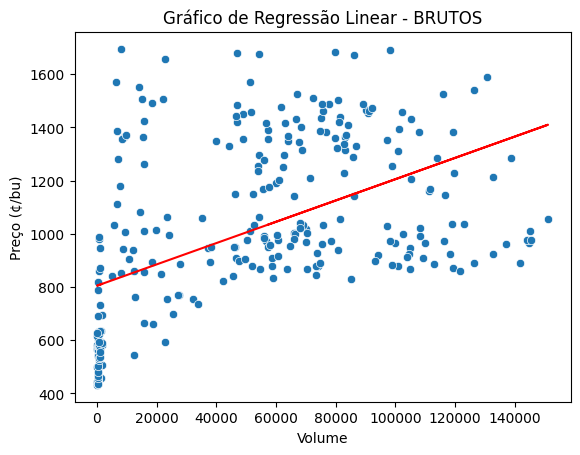

In [ ]:
import statsmodels.api as sm

#Criando o modelo
modelo = LinearRegression()


# Treinar o modelo de regressão linear
modelo.fit(X_bruto, y_bruto)


# # Adicionando uma coluna de 'uns' para o intercepto
# ##Quado a relação entre X e y não passa pela origem temos que a criação de uma coluna com intercepto permite que a reta de regressão se ajuste melhor aos dados.
X_com_intercepto = sm.add_constant(X_bruto)

# Ajustando o modelo com statsmodels
modelo_sm = sm.OLS(y_bruto, X_bruto).fit()


# Resumo do modelo
print(modelo_sm.summary())
print()
print(f"Equação de regressão: y = {modelo.coef_[0]:.4f}x + {modelo.intercept_:.4f}")
print()
# Plotando os pontos
sns.scatterplot(x=lista_v, y=lista_p) #gráfico plotado em termos reais (¢/bu e valume) - dados brutos

# Adicionando a reta de regressão
plt.plot(X_bruto, modelo.predict(X_bruto), color="red")
# Ajustando o título e os rótulos dos eixos
plt.title("Gráfico de Regressão Linear - BRUTOS")
plt.xlabel("Volume")
plt.ylabel("Preço (¢/bu)")

# Mostrando o gráfico
plt.show()

####Regressão Linear Simples (Dados Normalizados - BoxCox)

#####Dados normalizados - BoxCox

In [ ]:
# Importar bibliotecas
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# import statsmodels.api as sm
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.svm import SVC
# from sklearn.cluster import KMeans

# Manipulação para ps dados de entrada
## A fim de mitigar erros generalizados foram criadas novas listas
lista_p_bxcx = list(df_p_v_boxcox["Preços"])
print(lista_p_bxcx)
lista_v_bxcx = list(df_p_v_boxcox["Volumes"])
print(lista_v_bxcx)
print(type(lista_v_bxcx[0])) #verificação classe dos objetos - OK (FLOAT)
print(type(lista_p_bxcx[0])) #verificação classe dos objetos - OK (FLOAT)

##A partir dessas listas serão criados os arrays:
# Dados de entrada
X = np.array(lista_v_bxcx)
X = X.reshape(-1, 1) #para o treinamento do modelo, faz-se necessário a criação de um array tipo matriz para X
y = np.array(lista_p_bxcx) #para o treinamento do modelo, faz-se necessário a criação de um array tipo vetor para y
print(X)
print(y)

[128010.84219182823, 114674.38548752846, 104033.51047437674, 100519.5703125, 93176.54882812497, 98350.90483276639, 105609.83507812492, 127091.51388888892, 124041.11680010331, 110625.82031250007, 96050.08654300572, 97760.44451530617, 95622.04986149578, 94839.9943310657, 94886.9362880887, 104692.66007812491, 109017.46752324373, 115477.84975464868, 127234.4012500001, 161886.46597365703, 160537.88429752065, 160524.362578125, 148251.4621928165, 163641.55382812492, 160723.7506377551, 161243.88803854864, 162719.6121883656, 163550.6454081632, 182040.97002551006, 200057.74518140577, 195527.83340419517, 169652.62499999988, 160561.80165816325, 198817.17013888905, 267959.2412570888, 289770.31449099735, 296992.248192149, 335093.41124999995, 371101.9606128811, 481766.64608931943, 489354.3895266441, 448167.2812499996, 379775.4320764464, 310997.0555555555, 188804.62500000015, 157841.224489796, 138569.28748582763, 142005.93112244888, 146266.23657024783, 141784.28132812495, 144587.03124999997, 201366.73

#####Modelo Regressão - BoxCox

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.445
Method:                 Least Squares   F-statistic:                              225.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    9.86e-38
Time:                        16:29:44   Log-Likelihood:                         -4067.0
No. Observations:                 280   AIC:                                      8136.
Df Residuals:                     279   BIC:                                      8140.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

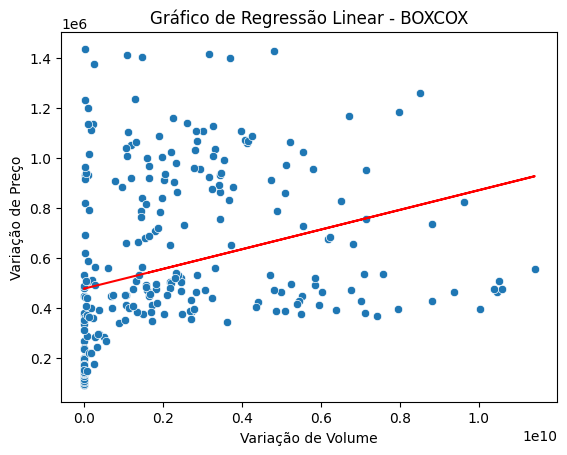

In [ ]:
#Criando o modelo
modelo = LinearRegression()
modelo.fit(X, y)


# # Adicionando uma coluna de uns para o intercepto
# ##Quado a relação entre X e y não passa pela origem temos que a criação de uma coluna com intercepto permite que a reta de regressão se ajuste melhor aos dados.
X_com_intercepto = sm.add_constant(X)

# Ajustando o modelo com statsmodels
modelo_sm = sm.OLS(y, X).fit()

# Resumo do modelo
print(modelo_sm.summary())
print()
print(f"Equação de regressão: y = {modelo.coef_[0]:.4f}x + {modelo.intercept_:.4f}")
print()
# Plotando os pontos
sns.scatterplot(x=lista_v_bxcx, y=lista_p_bxcx) #gráfico plotado em termos de variação - dados boxcox

# Adicionando a reta de regressão
plt.plot(X, modelo.predict(X), color="red")
# Ajustando o título e os rótulos dos eixos
plt.title("Gráfico de Regressão Linear - BOXCOX")
plt.xlabel("Variação de Volume")
plt.ylabel("Variação de Preço")

# Mostrando o gráfico
plt.show()

##CLUSTERIZAÇÃO **(SCIKITLEARN)**

A ideia inicial da clusterização é obter periodos mais padronizados para analises mais aprofundadas e estabelecimento de modelos de regressão mais precisos por determinados agrupamentos de períodos.

A clusterização é realizada com base em dados mensais a fim de captarmos diferentes variações ao longo de todo o periodo (2000 a 2024). Em seguida será verificado essa clusterização em periodos menores, de modo a obter as melhores regressões por periodo agrupado e em diferentes horizontes de tempo.

(Exemplo: para estudar a variação de preços de soja sob condições de normalidade o ideal é agrupar em determinados periodos periodos de tempo. Desta forma aumentar-se-á a precisão e acurácia das regressões ajustadas).

A ideia desse estudo é compreender melhor as fontes de variação de preço e volume, impactando em melhores estratégias de comercialização de grãos/hedge e especulação.

Serão utilizadas dois métodos de clusterização:

*   **KMEANS** - baseado na distancia euclidiana para definição de agrupamento dos dados;

*   **Modelos Mistura de Gaussianas (GMM)** - Este modelo assume que os dados são gerados por uma mistura de distribuições normais. O GMM pode estimar os parâmetros de cada distribuição normal e a probabilidade de cada ponto pertencer a cada uma delas.

**INTERPRETAÇÃO DOS RESULTADOS OBTIDOS:**
Tanto para o método GMM assim como o Kmeans, foi encontrado um numero de clusters ótimo proximos a 9. O que fortalece a ideia da necessidade da formação de subgrupos de estudo.

Utilizando o kmeans em uma analise com o preço e indice (representando as datas) temos um viés temporal no contexto da clusterização. A analise que reforça a ideia da necessidade de subdividir estes dados em menores periodos agrupados dentro de um **horizonte de tempo crescente**.

De maneira semelhante, entretanto sem um viés temporal, apenas em função de um agrupamento de preços da soja. O metodo GMM reforçou a ideia de subdividir esses dados em subgrupos, mas reforçando a ideia de uma agregação normal entre valores proximos dentro de 9 clusters.


**PRÓXIMAS ETAPAS DO ESTUDO:**
Serão selecionados subperiodos com caracteristicas próximas a uma distribuição normal, descritivamente falando. Para que sejam realizados novas regressões (**não somente lineares**),e principalmente com um componente estatistico mais correto respeitando as premissas.

Ajustadas as regressões, serão realizadas novas clusterizações, a fim de buscar um periodo ótimo para o estudo de variaveis que influenciam no preço da soja. Em um primeiro momento as regressões serão baseadas no horizonte de tempo e no volume. Mas ao encontrar um periodo de tempo com maior concisão de dados serão aplicadas novas variaveis independentes relacionadas aos fundamentos da formação de preço da soja.

Dado o periodo ideal para estudo dos preços será possivel atribuir caracteristicas paramétricas mais concisas relacionadas aos fundamentos da soja.

A ideia é contribuir para categorização de cenários com foco em previsão de preços baseadas nas caracteristicas estudadas do passado para serem aplicadas quando em cenários semelhantes assim que verificados, por meio de regressões hierarquicas.



###CLUSTERIZAÇÃO - KMEANS

Em termos de parametro do numero de clusters a ser utilizados na GMM, rodei o metodo KMEANS.

Aprofundando esta analise utilizei a coluna dos indices e preços conjuntamente para criar uma espécie de clusterização temporal. Aumentei o peso dos indices em função das médias dos preços e do proprio indice, de modo que ambos obtivessem o mesmo peso. Apesar deste método não estar diretamente relacionado a esse tipo de clusterização é possivel realizar dentro deste dataframe em função da ordem dos dados.

Em função da disposição dos dados no df isso é possivel forçar esse viés tempora. Pois os dados estão organizados desde o periodo mais antigo até o mais recente, sendo as datas mais antigas indexadas por numeros menores enquanto as datas mais recentes com maiores numeros.

Assim foi utilizado o indice da tabela como coluna de modo a obter uma relação crescente no processo de clusterização.

Ao aplicar o metodo do cotovelo na verificação do numero de clusters, observamos que o numero de clesters ótimo esta entre 7 a 10 grupos, aproximadamente.

Todas as analises acima obtiveram resultados semelhantes em termos de número otimo de clusters reforçando ainda mais a coerencia do resultado encontrado.

**Resumindo:**

Em outras palavras, após aplicar o método do cotovelo e determinar o número ideal de clusters (por exemplo, 10), os resultados podem ser agrupados em ordem crescente. O KMeans ordena os clusters internamente pela distância ao centroide, o que significa que os clusters subsequentes geralmente representam períodos de tempo mais recentes levando em consideração a analise feita com o indice. Portanto esse agrupamento em série de clusters temporais pode ser levado em consideração, mas com cautela.

**Limitações:**

É importante lembrar que o KMeans  não leva em consideração a relação temporal entre os dados. O agrupamento por período é um efeito secundário da combinação de preço e índice ponderado, e a interpretação dos clusters como períodos de tempo distintos deve ser feita com cautela.

####CLUSTERIZAÇÃO - KMEANS - PREÇOS

#####CLUSTERIZAÇÃO - PREÇOS - MODELO

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Avaliar diferentes números de clusters
silhouette_coefs = []
for k in range(2, 30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_p_v_boxcox[['Preços']])
  labels = kmeans.labels_
  # Calcular o coeficiente de Silhouette fora do loop
  silhouette_coefficient = silhouette_score(df_p_v_boxcox[['Preços']], labels)
  silhouette_coefs.append(silhouette_coefficient)
  print(f"Número de clusters: {k}, Coeficiente de Silhouette: {silhouette_coefficient:.3f}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 2, Coeficiente de Silhouette: 0.681


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 3, Coeficiente de Silhouette: 0.654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 4, Coeficiente de Silhouette: 0.641


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 5, Coeficiente de Silhouette: 0.648


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 6, Coeficiente de Silhouette: 0.608


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 7, Coeficiente de Silhouette: 0.626


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 8, Coeficiente de Silhouette: 0.618


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 9, Coeficiente de Silhouette: 0.625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 10, Coeficiente de Silhouette: 0.586


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 11, Coeficiente de Silhouette: 0.593


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 12, Coeficiente de Silhouette: 0.586


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 13, Coeficiente de Silhouette: 0.582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 14, Coeficiente de Silhouette: 0.581


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 15, Coeficiente de Silhouette: 0.570


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 16, Coeficiente de Silhouette: 0.577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 17, Coeficiente de Silhouette: 0.576


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 18, Coeficiente de Silhouette: 0.563


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 19, Coeficiente de Silhouette: 0.576


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 20, Coeficiente de Silhouette: 0.580


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 21, Coeficiente de Silhouette: 0.578


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 22, Coeficiente de Silhouette: 0.578


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 23, Coeficiente de Silhouette: 0.577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 24, Coeficiente de Silhouette: 0.574


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 25, Coeficiente de Silhouette: 0.588


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 26, Coeficiente de Silhouette: 0.599


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 27, Coeficiente de Silhouette: 0.605


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 28, Coeficiente de Silhouette: 0.591


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 29, Coeficiente de Silhouette: 0.593


#####CLUSTERIZAÇÃO - PREÇOS - GRÁFICO

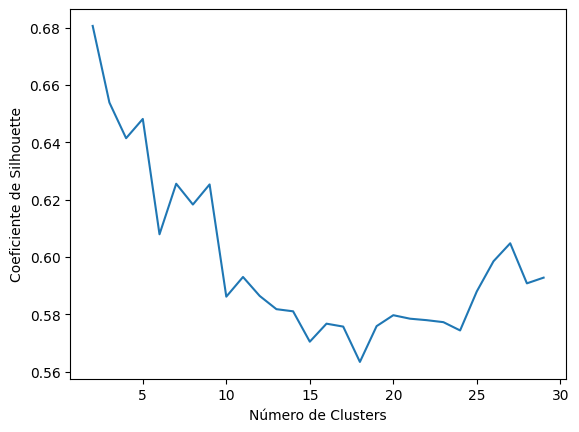

In [ ]:
# Plotar o gráfico do cotovelo
plt.plot(range(2, 30), silhouette_coefs)
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

####CLUSTERIZAÇÃO - KMEANS - VOLUMES

#####CLUSTERIZAÇÃO - VOLUMES - MODELO

In [ ]:
# Avaliar diferentes números de clusters
silhouette_coefs = []
for k in range(2, 30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_p_v_boxcox[['Volumes']])
  labels = kmeans.labels_
  # Calcular o coeficiente de Silhouette fora do loop
  silhouette_coefficient = silhouette_score(df_p_v_boxcox[['Volumes']], labels)
  silhouette_coefs.append(silhouette_coefficient)
  print(f"Número de clusters: {k}, Coeficiente de Silhouette: {silhouette_coefficient:.3f}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 2, Coeficiente de Silhouette: 0.697
Número de clusters: 3, Coeficiente de Silhouette: 0.629
Número de clusters: 4, Coeficiente de Silhouette: 0.666
Número de clusters: 5, Coeficiente de Silhouette: 0.694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 6, Coeficiente de Silhouette: 0.697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 7, Coeficiente de Silhouette: 0.695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 8, Coeficiente de Silhouette: 0.695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 9, Coeficiente de Silhouette: 0.680


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 10, Coeficiente de Silhouette: 0.676


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 11, Coeficiente de Silhouette: 0.673


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 12, Coeficiente de Silhouette: 0.686


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 13, Coeficiente de Silhouette: 0.684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 14, Coeficiente de Silhouette: 0.665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 15, Coeficiente de Silhouette: 0.656


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 16, Coeficiente de Silhouette: 0.666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 17, Coeficiente de Silhouette: 0.662


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 18, Coeficiente de Silhouette: 0.656
Número de clusters: 19, Coeficiente de Silhouette: 0.650
Número de clusters: 20, Coeficiente de Silhouette: 0.665
Número de clusters: 21, Coeficiente de Silhouette: 0.665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 22, Coeficiente de Silhouette: 0.666
Número de clusters: 23, Coeficiente de Silhouette: 0.666
Número de clusters: 24, Coeficiente de Silhouette: 0.668


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 25, Coeficiente de Silhouette: 0.681
Número de clusters: 26, Coeficiente de Silhouette: 0.674
Número de clusters: 27, Coeficiente de Silhouette: 0.678


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 28, Coeficiente de Silhouette: 0.682
Número de clusters: 29, Coeficiente de Silhouette: 0.679


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#####CLUSTERIZAÇÃO - VOLUMES - GRÁFICO

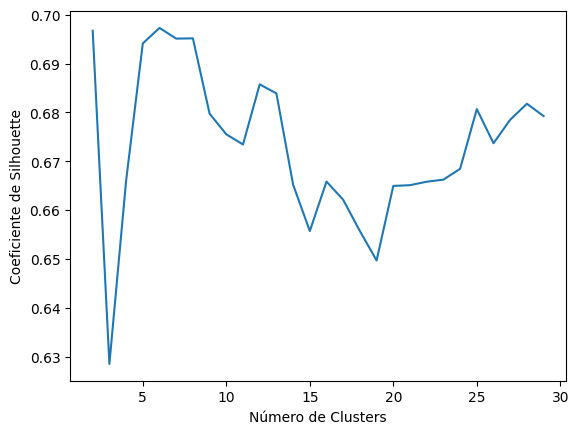

In [ ]:
# Plotar o gráfico do cotovelo
plt.plot(range(2, 30), silhouette_coefs)
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

####CLUSTERIZAÇÃO - KMEANS - PREÇOS e VOLUMES

#####CLUSTERIZAÇÃO - PREÇOS e VOLUMES - MODELO

In [ ]:
# Avaliar diferentes números de clusters
silhouette_coefs = []
for k in range(2, 30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_p_v_boxcox[['Preços', 'Volumes']])
  labels = kmeans.labels_
  # Calcular o coeficiente de Silhouette fora do loop
  silhouette_coefficient = silhouette_score(df_p_v_boxcox[['Preços', 'Volumes']], labels)
  silhouette_coefs.append(silhouette_coefficient)
  print(f"Número de clusters: {k}, Coeficiente de Silhouette: {silhouette_coefficient:.3f}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número de clusters: 2, Coeficiente de Silhouette: 0.697
Número de clusters: 3, Coeficiente de Silhouette: 0.629
Número de clusters: 4, Coeficiente de Silhouette: 0.666
Número de clusters: 5, Coeficiente de Silhouette: 0.694
Número de clusters: 6, Coeficiente de Silhouette: 0.698
Número de clusters: 7, Coeficiente de Silhouette: 0.696
Número de clusters: 8, Coeficiente de Silhouette: 0.692
Número de clusters: 9, Coeficiente de Silhouette: 0.680
Número de clusters: 10, Coeficiente de Silhouette: 0.676
Número de clusters: 11, Coeficiente de Silhouette: 0.675
Número de clusters: 12, Coeficiente de Silhouette: 0.671


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número de clusters: 13, Coeficiente de Silhouette: 0.684
Número de clusters: 14, Coeficiente de Silhouette: 0.662
Número de clusters: 15, Coeficiente de Silhouette: 0.666
Número de clusters: 16, Coeficiente de Silhouette: 0.646


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 17, Coeficiente de Silhouette: 0.663
Número de clusters: 18, Coeficiente de Silhouette: 0.667
Número de clusters: 19, Coeficiente de Silhouette: 0.663
Número de clusters: 20, Coeficiente de Silhouette: 0.664


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 21, Coeficiente de Silhouette: 0.665
Número de clusters: 22, Coeficiente de Silhouette: 0.661
Número de clusters: 23, Coeficiente de Silhouette: 0.653
Número de clusters: 24, Coeficiente de Silhouette: 0.668


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 25, Coeficiente de Silhouette: 0.667
Número de clusters: 26, Coeficiente de Silhouette: 0.672
Número de clusters: 27, Coeficiente de Silhouette: 0.667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 28, Coeficiente de Silhouette: 0.669
Número de clusters: 29, Coeficiente de Silhouette: 0.674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#####CLUSTERIZAÇÃO - PREÇOS e VOLUMES - GRÁFICO

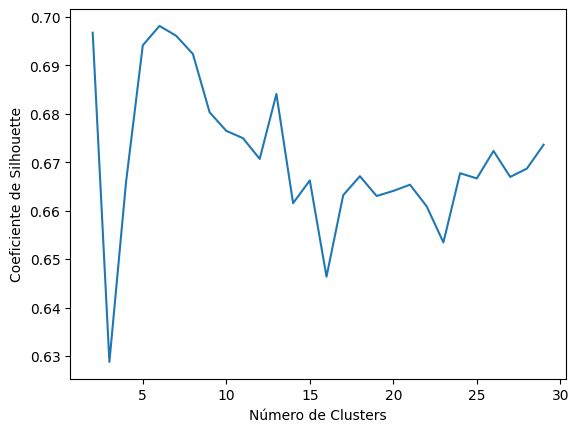

In [ ]:
# Plotar o gráfico do cotovelo
plt.plot(range(2, 30), silhouette_coefs)
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

####CLUSTERIZAÇÃO - KMEANS - PREÇOS e DATAS

#####CLUSTERIZAÇÃO - PREÇOS e DATAS - MODELO

 Multipliquei a coluna IndNum por 4044.23, numero obtido a partir da divisão entre a média geral dos preços e média geral do indices. Desta forma na analise teremos pesos semelhantes entre indice e preços na criação dos clusters, corroborando para um viés temporal dos clusters.



In [ ]:
df_p_v_boxcox['IndNum'] = df_p_v_boxcox.index*4044.23
print(df_p_v_boxcox)
print(df_p_v_boxcox['Preços'].mean())
print(df_p_v_boxcox['IndNum'].mean())
# Avaliar diferentes números de clusters
silhouette_coefs = []
for k in range(2, 30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_p_v_boxcox[['Preços', 'IndNum']])
  labels = kmeans.labels_
  # Calcular o coeficiente de Silhouette fora do loop
  silhouette_coefficient = silhouette_score(df_p_v_boxcox[['Preços', 'IndNum']], labels)
  silhouette_coefs.append(silhouette_coefficient)
  print(f"Número de clusters: {k}, Coeficiente de Silhouette: {silhouette_coefficient:.3f}")

         Datas         Preços       Volumes      IndNum
0   2000-12-31  128010.842192  1.370732e+06        0.00
1   2001-01-31  114674.385488  2.055570e+04     4044.23
2   2001-02-28  104033.510474  9.476292e+05     8088.46
3   2001-03-31  100519.570312  7.395458e+04    12132.69
4   2001-04-30   93176.548828  5.654661e+03    16176.92
..         ...            ...           ...         ...
275 2023-11-30  904335.877622  2.281402e+09  1112163.25
276 2023-12-31  859261.677812  5.089633e+09  1116207.48
277 2024-01-31  756639.869118  3.437172e+09  1120251.71
278 2024-02-29  683733.062578  6.223263e+09  1124295.94
279 2024-03-31  689834.738770  1.651817e+09  1128340.17

[280 rows x 4 columns]
564171.0655516619
564170.0850000001
Número de clusters: 2, Coeficiente de Silhouette: 0.501


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 3, Coeficiente de Silhouette: 0.517


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 4, Coeficiente de Silhouette: 0.586


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 5, Coeficiente de Silhouette: 0.586


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 6, Coeficiente de Silhouette: 0.574
Número de clusters: 7, Coeficiente de Silhouette: 0.532
Número de clusters: 8, Coeficiente de Silhouette: 0.520
Número de clusters: 9, Coeficiente de Silhouette: 0.482
Número de clusters: 10, Coeficiente de Silhouette: 0.470
Número de clusters: 11, Coeficiente de Silhouette: 0.476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número de clusters: 12, Coeficiente de Silhouette: 0.481
Número de clusters: 13, Coeficiente de Silhouette: 0.495
Número de clusters: 14, Coeficiente de Silhouette: 0.516
Número de clusters: 15, Coeficiente de Silhouette: 0.498


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 16, Coeficiente de Silhouette: 0.514
Número de clusters: 17, Coeficiente de Silhouette: 0.500
Número de clusters: 18, Coeficiente de Silhouette: 0.481
Número de clusters: 19, Coeficiente de Silhouette: 0.504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 20, Coeficiente de Silhouette: 0.510
Número de clusters: 21, Coeficiente de Silhouette: 0.511
Número de clusters: 22, Coeficiente de Silhouette: 0.500


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 23, Coeficiente de Silhouette: 0.502
Número de clusters: 24, Coeficiente de Silhouette: 0.513
Número de clusters: 25, Coeficiente de Silhouette: 0.508


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 26, Coeficiente de Silhouette: 0.501
Número de clusters: 27, Coeficiente de Silhouette: 0.498
Número de clusters: 28, Coeficiente de Silhouette: 0.498


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clusters: 29, Coeficiente de Silhouette: 0.487


#####CLUSTERIZAÇÃO - PREÇOS e DATAS - GRÁFICO

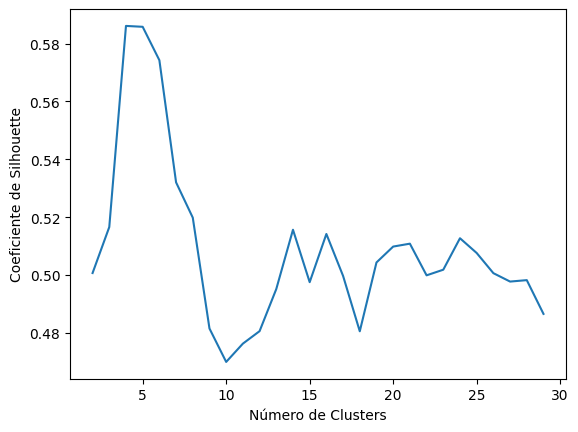

In [ ]:
# Plotar o gráfico do cotovelo
plt.plot(range(2, 30), silhouette_coefs)
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

###CLUSTERIZAÇÃO - GMM

    silhueta  calinski_harabasz
5   0.579632        1283.194050
6   0.563329        1250.508516
7   0.575919        1323.833028
8   0.580022        2310.564003
9   0.598887        2829.832357
10  0.583957        3037.953976
11  0.578481        3352.258673
12  0.566272        3211.269045
13  0.575531        3726.541553
14  0.587310        4510.674751


NameError: name 'calculate_iqr' is not defined

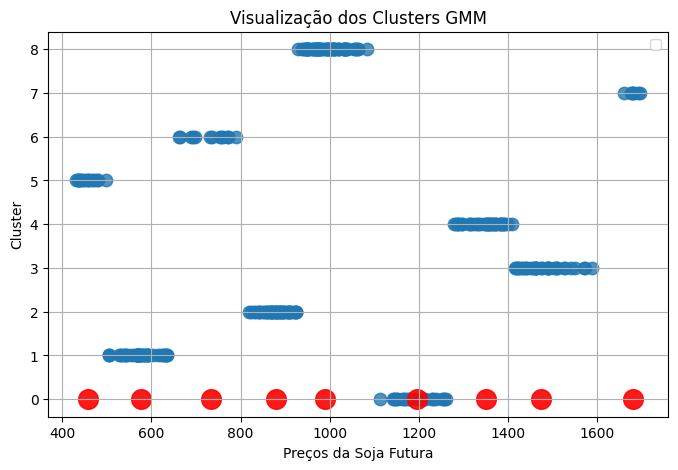

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import norm  # Importando norm do scipy.stats
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Selecionando a coluna de preços
precos = df_p_v['Preços'].to_numpy()

# Usando todos os dados para treino
X_train = precos

# Definindo o intervalo de clusters
n_clusters = np.arange(5, 15)

# Criando um dicionário para armazenar os resultados
resultados = {}

# Treinando o modelo GMM para cada número de clusters
for n in n_clusters:
    modelo_gmm = GaussianMixture(n_components=n, random_state=42)
    modelo_gmm.fit(X_train.reshape(-1, 1))

    # Avaliando o modelo
    resultados[n] = {
        "silhueta": silhouette_score(X_train.reshape(-1, 1), modelo_gmm.predict(X_train.reshape(-1, 1))),
        "calinski_harabasz": calinski_harabasz_score(X_train.reshape(-1, 1), modelo_gmm.predict(X_train.reshape(-1, 1)))
    }

# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados).T

# Mostrando o DataFrame
print(df_resultados.to_string())

# Selecionando o número ótimo de clusters
numero_clusters_ideal = df_resultados.index[df_resultados['silhueta'].argmax()]

# Treinando o modelo GMM final
modelo_gmm_final = GaussianMixture(n_components=numero_clusters_ideal, random_state=42)
modelo_gmm_final.fit(X_train.reshape(-1, 1))

# Definindo a função para plotar o ajuste Gaussiano
def fit_gaussiano (data, mean, std, color):
    """
    Função para plotar a curva Gaussiana ajustada para um cluster.

    Args:
        data: Array com os dados do cluster (preços).
        mean: Média do cluster.
        std: Desvio padrão do cluster.
        color: Cor da curva Gaussiana.
    """

    # Definindo o intervalo de valores para a curva Gaussiana
    x = np.linspace(data.min(), data.max(), 100)

    # Ajustando a curva Gaussiana
    y = norm(loc=mean, scale=std).pdf(x)

    # Plotando a curva Gaussiana
    plt.figure(figsize=(8, 5))
    plt.plot(x, y.ravel(), color=color, label=f"Cluster {color}")
    plt.title('Visualização dos Clusters GMM com Ajuste Gaussiano e Amplitude Interquartil')
    plt.xlabel('Preços da Soja Futura')
    plt.ylabel('Densidade de Probabilidade')
    plt.grid(True)
    plt.legend()


# Visualizando os clusters
predicted_labels = modelo_gmm_final.predict(X_train.reshape(-1, 1))

# Adicionando rótulos e título para melhor interpretação
plt.figure(figsize=(8, 5))
plt.xlabel('Preços da Soja Futura')
plt.ylabel('Cluster')
plt.title('Visualização dos Clusters GMM')
plt.grid(True)
plt.legend()


# Plotando os pontos e seus clusters
plt.scatter(X_train, predicted_labels, s=80, alpha=0.8)
# Plotando os centros de cada cluster como marcadores maiores
plt.scatter(modelo_gmm_final.means_, np.zeros_like(modelo_gmm_final.means_), s=200, c='red', marker='o', alpha=0.9, label='Centros Clusters')



# Adicionando linhas para amplitude interquartil (IQR)
medias = modelo_gmm_final.means_
desvios_padrao = np.sqrt(modelo_gmm_final.covariances_)
amplitudes = [calculate_iqr(data) for data in modelo_gmm_final.predict(X_train.reshape(-1, 1))]
for i in range(len(medias)):

    # Filtrando os dados do cluster atual
    cluster_data = X_train[modelo_gmm_final.predict(X_train.reshape(-1, 1)) == i]

    # Verificando se há dados para o cluster atual (evita erros)
    if len(cluster_data) > 0:
        fit_gaussiano (cluster_data, medias[i], desvios_padrao[i], f"C{i+1}")
        plt.axvline(medias[i] - amplitudes[i]/2, color=f"C{i+1}", alpha=0.5, linestyle='dashed')
        plt.axvline(medias[i] + amplitudes[i]/2, color=f"C{i+1}", alpha=0.5, linestyle='dashed')







### Decomposição serie temporal **TRABALHANDO**

             Open   High     Low   Close  Adj Close  Volume  Preço Amanhã
Date                                                                     
2000-12-04  508.0  508.0  503.50  505.25     505.25     159        502.00
2000-12-05  504.0  504.0  501.50  502.00     502.00     249        499.75
2000-12-06  500.0  500.0  498.50  499.75     499.75     892        509.75
2000-12-07  507.0  510.0  506.75  509.75     509.75     311        500.00
2000-12-08  503.0  503.0  499.50  500.00     500.00     411        509.00


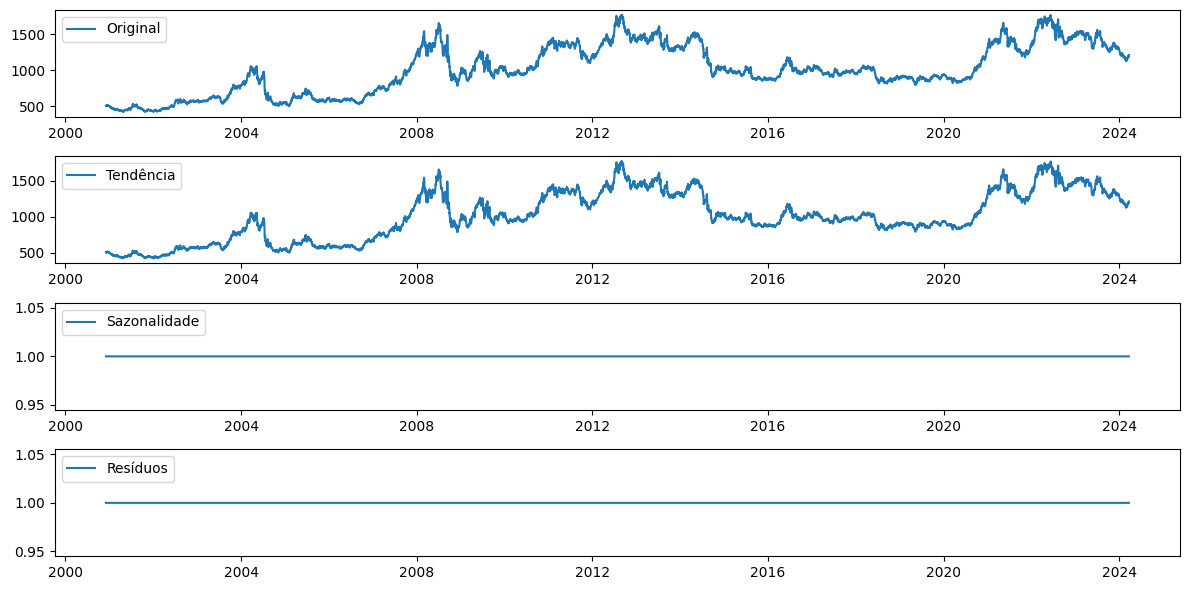

Verificação de estacionariedade para a série original:
ADF Statistic: -2.293
p-value: 0.174
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Métricas de Avaliação:
MAE: 11.359854596488073
MSE: 283.9925960621898
RMSE: 16.85207987348119
R2 Score: 0.997557035268404
              Open     High      Low    Close  Adj Close  Volume  Preço Amanhã
Date                                                                          
2000-12-04   508.0   508.00   503.50   505.25     505.25     159        502.00
2000-12-05   504.0   504.00   501.50   502.00     502.00     249        499.75
2000-12-06   500.0   500.00   498.50   499.75     499.75     892        509.75
2000-12-07   507.0   510.00   506.75   509.75     509.75     311        500.00
2000-12-08   503.0   503.00   499.50   500.00     500.00     411        509.00
...            ...      ...      ...      ...        ...     ...           ...
2024-03-14  1182.0  1198.50  1180.75  1180.75    1180.75  164064       1198.25
2024-03-15  1194.5  1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Visualizar os primeiros registros do DataFrame
print(df_soy.head())

# Decomposição da série temporal
result = seasonal_decompose(df_soy['Close'], model='multiplicative', period=1)  # Period define a periodicidade da sazonalidade
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Visualizar a decomposição
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(df_soy['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Resíduos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Verificar estacionariedade
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))

print('Verificação de estacionariedade para a série original:')
adf_test(df_soy['Close'])

# Regressão linear
# Criar a variável "preço amanhã"
df_soy['Preço Amanhã'] = df_soy['Close'].shift(-1)

# Remover a última linha (que ficou com NaN após o deslocamento)
df_soy.dropna(inplace=True)

# Definir variáveis preditoras e alvo
X = df_soy[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df_soy['Preço Amanhã']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazer previsões
predictions = model.predict(X_test_scaled)

# Avaliar o desempenho do modelo
print('Métricas de Avaliação:')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

print(df_soy)